In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Understand The Data

In [3]:
df.shape

(119390, 36)

In [4]:
pd.set_option('display.max_columns',36)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
df.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [9]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

This is no balance dataset, which city hotel number almost 2 times than the resort hotel number.
this is useful to know, when we are creating the model. there are methods where you can actually balance the dataset.

In [10]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

BB = bed and breakfast. HB = breakfast and other (usually dinner). SC & undefined = no breakfast. FB = Fullbreakfast (breakfast, lunch, dinner).

In [11]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [12]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [13]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [14]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [16]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

([<matplotlib.patches.Wedge at 0x21f58b87ca0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'Not Canceled'),
  Text(0.9564161333812984, 0.5433858480011848, 'Canceled')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

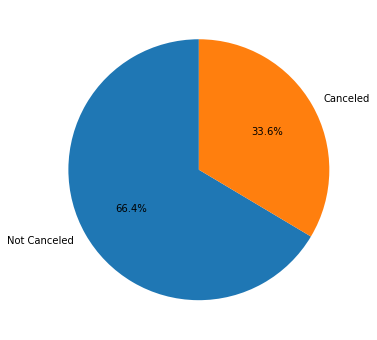

In [76]:
canceled = df['hotel'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(canceled, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

<AxesSubplot:xlabel='hotel', ylabel='count'>

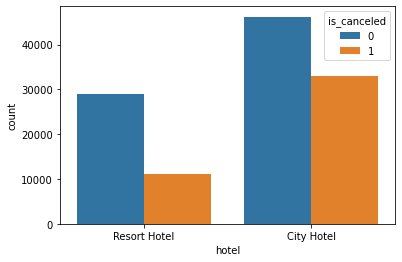

In [77]:
sns.countplot(data=df,x='hotel',hue='is_canceled')

This is the distribution resort hotel and city hotel. Obviously the number of guests are also more in city hotel, the number of cancellation is also from the city hotel more compared to the resort hotel.

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

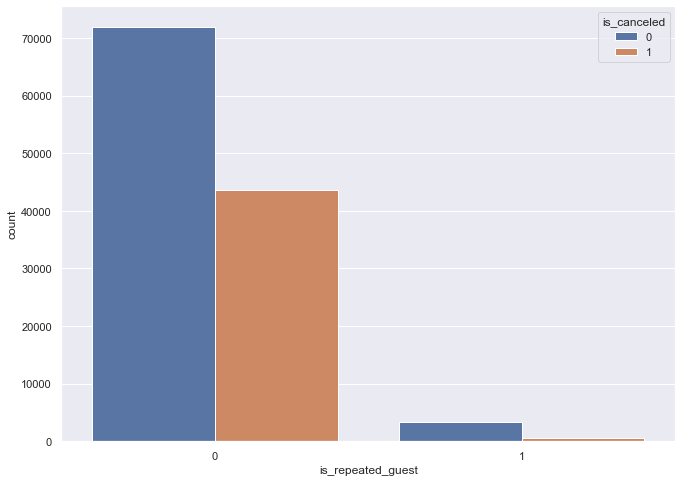

In [84]:
sns.countplot(data=df,x='is_repeated_guest',hue='is_canceled')

This is the distribution of guests who have both canceled and not canceled their bookings. Clearly, the number of guests who made their first-time bookings is higher than those who have rebooked, and the number of cancellations is also higher among the first-time bookings compared to the repeat bookings.

<AxesSubplot:xlabel='market_segment', ylabel='count'>

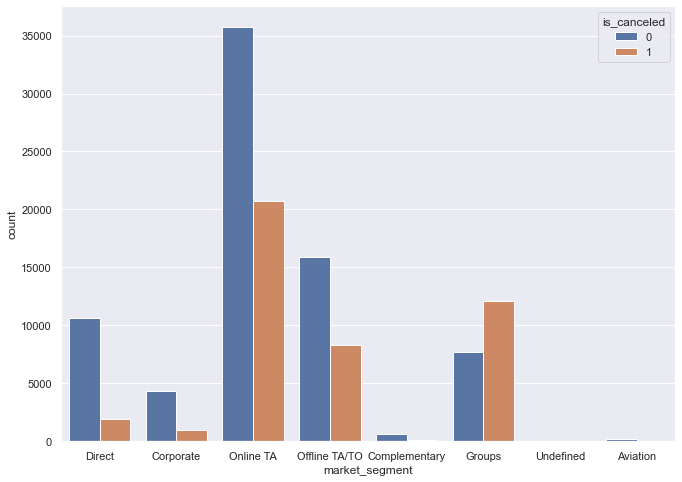

In [81]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(data=df,x='market_segment',hue='is_canceled')

This is the distribution of market segment. Online Travel Agents has highest number of book and also has more cancelation that the other market segment.

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

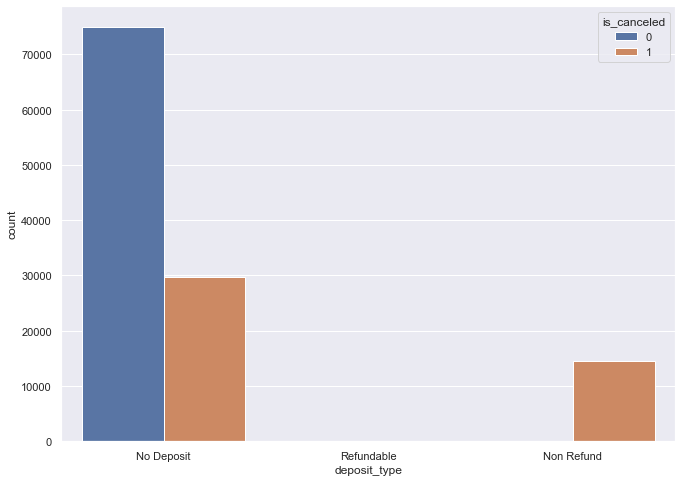

In [82]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(data=df,x='deposit_type',hue='is_canceled')

This is the distribution of deposit type. Based on data, people more prefer to book hotel with No Deposit.

## Missing Value and Handling

In [20]:
df.isnull().values.any()

True

In [21]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
df.fillna(0,inplace=True)

In [23]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [24]:
df['meal'].replace('Undefined','SC', inplace=True)

In [25]:
df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [26]:
subset=df[(df['children']==0)&(df['adults']==0)&(df['babies']==0)]

In [27]:
subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [28]:
delete=(df['children']==0)&(df['adults']==0)&(df['babies']==0)

In [29]:
df2=df[~delete]
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [30]:
df2.shape

(119210, 36)

In [31]:
df2.to_csv('hotel_booking_updated.csv', index=False)

## Duplicated Value Check and Handling

In [32]:
df.duplicated().sum()

0

## Where Do The Guest Come From?

In [33]:
guest_country=df2[df2['is_canceled']==0]['country'].value_counts().reset_index()
guest_country

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [34]:
guest_country=df2[df2['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns=['country','Number of guest']

In [35]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [36]:
total_guests = guest_country['Number of guest'].sum()
guest_country['guests in %'] = round(guest_country['Number of guest']/total_guests*100, 2)

In [37]:
guest_country

,country,Number of guest,guests in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


In [38]:
trace= go.Bar(
    x=guest_country['country'],
    y=guest_country['Number of guest'],
    marker=dict(color='blue')
)
data1 = [trace]
layout = go.Layout(
    title='Guests by Country'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

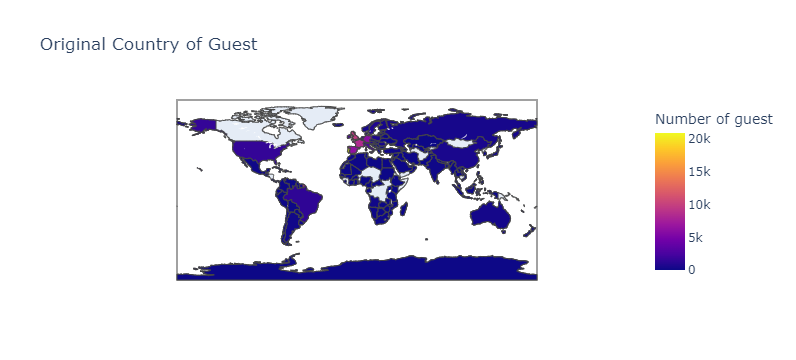

In [86]:
map_guest = px.choropleth(guest_country,
                          locations=guest_country['country'],
                          color=guest_country['Number of guest'],
                          hover_name=guest_country['country'],
                          title='Original Country of Guest')
map_guest.show()

The majority of the guests' original country of origin is from Europe, with a particular emphasis on Portugal, where the hotel is located.

## Number Resort and City Hotel per Night over The Month

In [40]:
resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled']==0)]
city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled']==0)]

In [41]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [42]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [43]:
adr_hotel=resort_hotel.merge(city_hotel,on='arrival_date_month')
adr_hotel.columns=['month','price_resort_hotel','price_city_hotel']
adr_hotel

,month,price_resort_hotel,price_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [44]:
pip install sort-dataframeby-monthorweek

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install sorted-months-weekdays

Note: you may need to restart the kernel to use updated packages.


In [46]:
import sort_dataframeby_monthorweek as sd
adr_hotel=sd.Sort_Dataframeby_Month(df=adr_hotel, monthcolumnname='month')
adr_hotel

,month,price_resort_hotel,price_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


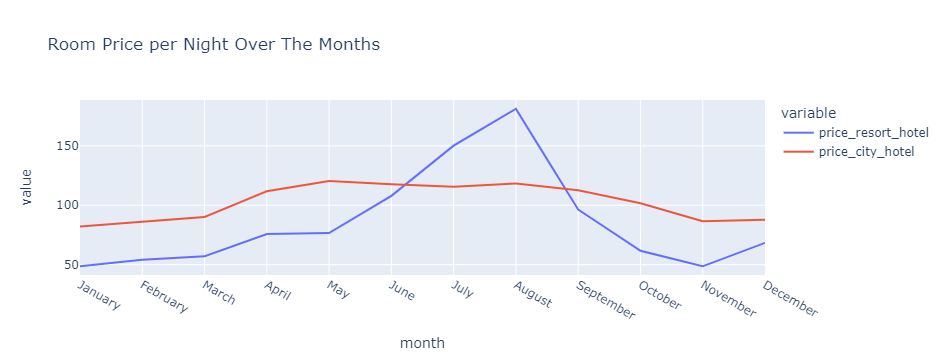

In [47]:
px.line(adr_hotel, x='month',
        y=['price_resort_hotel','price_city_hotel'],
        title='Room Price per Night Over The Months')

This represents the distribution of prices per month. The resort hotel has the highest prices in August, whereas the city hotel records its highest prices in May and August. It appears that the city hotel generally maintains higher prices than the resort hotel, which can be attributed to various factors such as the volume of bookings and the number of guests.

## How Much Do Guests Pay for a Room per Night

In [48]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

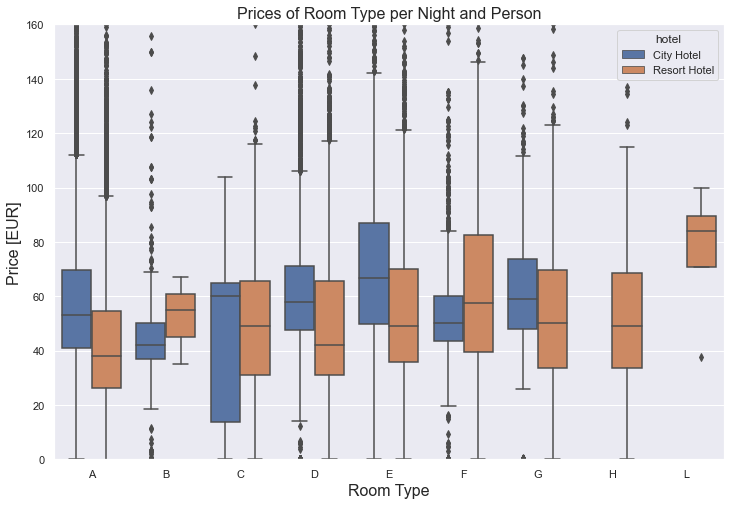

In [88]:
df['adr_updated']=df['adr']/(df['adults']+df['children'])
valid_guest=df.loc[df['is_canceled']==0]
prices = valid_guest[['hotel','reserved_room_type','adr_updated']].sort_values('reserved_room_type')

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y='adr_updated',
            hue='hotel',
            data=prices
           )
plt.title('Prices of Room Type per Night and Person', fontsize=16)
plt.xlabel('Room Type', fontsize=16)
plt.ylabel('Price [EUR]', fontsize=16)

plt.ylim(0, 160)
plt.show()

The points which are above this boxplot is called outliers that means these are the extreme data points. Some example if the price is usually 10 in some extreme cases it will be 1000. 10 to 1000 there is a lot of difference, these are called the outliers.

In [87]:
prices_C = prices[prices['reserved_room_type']=='C']
prices_C

,hotel,reserved_room_type,adr_updated
25853,Resort Hotel,C,82.500000
26926,Resort Hotel,C,60.250000
26108,Resort Hotel,C,49.125000
26861,Resort Hotel,C,162.000000
26535,Resort Hotel,C,43.262500
...,...,...,...
27439,Resort Hotel,C,52.790000
29232,Resort Hotel,C,29.666667
31571,Resort Hotel,C,91.750000
27407,Resort Hotel,C,85.215000


In [51]:
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']
prices_Resort

,hotel,reserved_room_type,adr_updated
25853,Resort Hotel,C,82.500000
26926,Resort Hotel,C,60.250000
26108,Resort Hotel,C,49.125000
26861,Resort Hotel,C,162.000000
26535,Resort Hotel,C,43.262500
...,...,...,...
27439,Resort Hotel,C,52.790000
29232,Resort Hotel,C,29.666667
31571,Resort Hotel,C,91.750000
27407,Resort Hotel,C,85.215000


In [52]:
prices_City

,hotel,reserved_room_type,adr_updated
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
111027,City Hotel,C,NaN
80557,City Hotel,C,18.5
44693,City Hotel,C,65.0
119278,City Hotel,C,104.0
101137,City Hotel,C,55.0
82508,City Hotel,C,0.0
82509,City Hotel,C,0.0


In [53]:
prices_Resort.describe()

,adr_updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


In [54]:
prices_City.describe()

,adr_updated
count,8.00000
mean,46.56250
std,36.86601
min,0.00000
25%,13.87500
50%,60.00000
75%,65.00000
max,104.00000


Some example in price_resort room type C, IQR=75%-25% =34, W = 1.5(34)= 51. 75%+W=116, 116 i sthe maximum of the boxplot, even based on describe the maximum is 171, it means the data above 116 is a outlier.

## How Long Does The Customer Stay

In [55]:
df3=df[df['is_canceled']==0]
df3['total_nights']=df3['stays_in_weekend_nights']+df3['stays_in_week_nights']

C:\Users\Farha\AppData\Local\Temp\ipykernel_3220\3587871988.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,adr_updated,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,...,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0.000000,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,...,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0.000000,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,...,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,75.000000,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,...,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,75.000000,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,...,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,49.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,...,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,48.070000,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,...,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,75.143333,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,...,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,78.855000,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,...,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,52.200000,7


In [57]:
df4=df3[['total_nights','hotel','is_canceled']]
df4

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,7,City Hotel,0
119386,7,City Hotel,0
119387,7,City Hotel,0
119388,7,City Hotel,0


In [58]:
hotel_stay=df4.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay

,total_nights,hotel,is_canceled
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [59]:
hotel_stay=hotel_stay.rename(columns={'is_canceled':'Number of Stays'})
hotel_stay.head()

,total_nights,hotel,Number of Stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


In [60]:
hotel_stay_resort=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_resort

,total_nights,hotel,Number of Stays
1,0,Resort Hotel,372
3,1,Resort Hotel,6580
5,2,Resort Hotel,4488
7,3,Resort Hotel,3830
9,4,Resort Hotel,3321
11,5,Resort Hotel,1900
13,6,Resort Hotel,1206
15,7,Resort Hotel,4435
17,8,Resort Hotel,511
19,9,Resort Hotel,408


In [61]:
hotel_stay_city=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_city

,total_nights,hotel,Number of Stays
0,0,City Hotel,308
2,1,City Hotel,9169
4,2,City Hotel,10992
6,3,City Hotel,11895
8,4,City Hotel,7704
10,5,City Hotel,3221
12,6,City Hotel,1116
14,7,City Hotel,1251
16,8,City Hotel,209
18,9,City Hotel,120


In [62]:
trace1 =go.Bar(
    x=hotel_stay_resort['total_nights'],
    y=hotel_stay_resort['Number of Stays'],
    name='Resort Stay'
)

trace2 = go.Bar(
    x=hotel_stay_city['total_nights'],
    y=hotel_stay_city['Number of Stays'],
    name='City Stay'
)

df5 = [trace1,trace2]
layout = go.Layout(
    title='Total Number of Stays by Guest'
)
fig=go.Figure(data=df5, layout=layout)
pyo.plot(fig)

'temp-plot.html'

Many customer book city for 3 nights, and resort hotel for 1 night.

## Booking by Market Segment

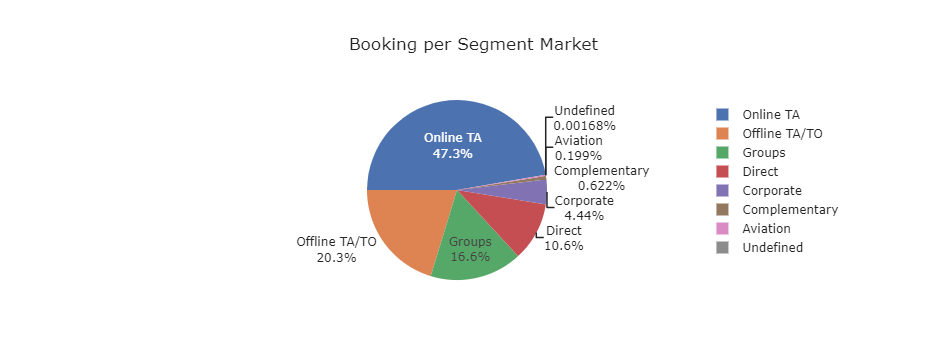

In [63]:
segments=df['market_segment'].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title='Booking per Segment Market',
             template='seaborn')
fig.update_traces(rotation=-90, textinfo='percent+label')
fig.show()

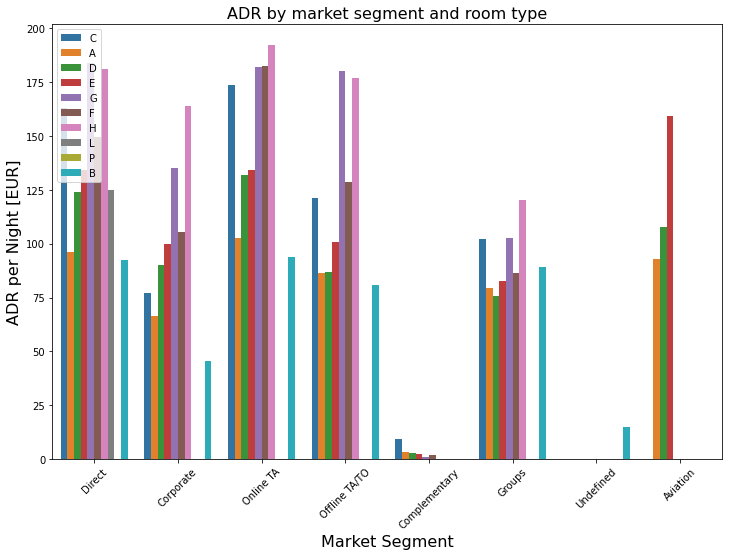

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x='market_segment',
            y='adr',
            hue='reserved_room_type',
            data=df,
            ci=None)
plt.title('ADR by market segment and room type', fontsize=16)
plt.xlabel('Market Segment', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('ADR per Night [EUR]', fontsize=16)
plt.legend(loc='upper left')
plt.show()

## How Many Booking Were Canceled

In [65]:
cancel=df['is_canceled']==1

In [66]:
total_cancel = cancel.sum()
total_cancel

44224

In [67]:
resort_cancelation = df.loc[df['hotel']=='Resort Hotel']['is_canceled'].sum()
city_cancelation = df.loc[df['hotel']=='City Hotel']['is_canceled'].sum()

In [68]:
resort_cancelation

11122

In [69]:
city_cancelation

33102

In [70]:
print(f'Total Booking Canceled : {total_cancel} . ')
print(f'Total Resort Hotel Booking Canceled : {resort_cancelation} . ')
print(f'Total City Hotel Booking Canceled : {city_cancelation} . ')

Total Booking Canceled : 44224 . 
Total Resort Hotel Booking Canceled : 11122 . 
Total City Hotel Booking Canceled : 33102 . 


## Which Month Have The Highest Number of Cancelation

In [71]:
resort_book_per_month = df.loc[(df['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['hotel'].count()
resort_cancel_per_month = df.loc[(df['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

city_book_per_month = df.loc[(df['hotel'] == 'City Hotel')].groupby('arrival_date_month')['hotel'].count()
city_cancel_per_month = df.loc[(df['hotel'] == 'CIty Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

resort_cancel_data = pd.DataFrame({'Hotel': 'Resort Hotel',
                                   'Month': list(resort_book_per_month.index),
                                   'Booking': list(resort_book_per_month.values),
                                   'cancelations': list(resort_book_per_month.values)})
city_cancel_data = pd.DataFrame({'Hotel': 'City Hotel',
                                 'Month': list(city_book_per_month.index),
                                 'Booking': list(city_book_per_month.values),
                                 'cancelations': list(city_book_per_month.values)})
full_cancel_data = pd.concat([resort_cancel_data, city_cancel_data], ignore_index=True)

In [72]:
full_cancel_data

,Hotel,Month,Booking,cancelations
0,Resort Hotel,April,3609,3609
1,Resort Hotel,August,4894,4894
2,Resort Hotel,December,2648,2648
3,Resort Hotel,February,3103,3103
4,Resort Hotel,January,2193,2193
5,Resort Hotel,July,4573,4573
6,Resort Hotel,June,3045,3045
7,Resort Hotel,March,3336,3336
8,Resort Hotel,May,3559,3559
9,Resort Hotel,November,2437,2437


In [89]:
import sort_dataframeby_monthorweek as sd
resort_cancel_data=sd.Sort_Dataframeby_Month(df=resort_cancel_data, monthcolumnname='Month')
resort_cancel_data

,Hotel,Month,Booking,cancelations
0,Resort Hotel,January,2193,2193
1,Resort Hotel,February,3103,3103
2,Resort Hotel,March,3336,3336
3,Resort Hotel,April,3609,3609
4,Resort Hotel,May,3559,3559
5,Resort Hotel,June,3045,3045
6,Resort Hotel,July,4573,4573
7,Resort Hotel,August,4894,4894
8,Resort Hotel,September,3108,3108
9,Resort Hotel,October,3555,3555


In [74]:
import sort_dataframeby_monthorweek as sd
city_cancel_data=sd.Sort_Dataframeby_Month(df=city_cancel_data, monthcolumnname='Month')
city_cancel_data

,Hotel,Month,Booking,cancelations
0,City Hotel,January,3736,3736
1,City Hotel,February,4965,4965
2,City Hotel,March,6458,6458
3,City Hotel,April,7480,7480
4,City Hotel,May,8232,8232
5,City Hotel,June,7894,7894
6,City Hotel,July,8088,8088
7,City Hotel,August,8983,8983
8,City Hotel,September,7400,7400
9,City Hotel,October,7605,7605


In [75]:
plt.figure(figsize=(12, 8))

trace3 =go.Bar(
    x=resort_cancel_data['Month'],
    y=resort_cancel_data['cancelations'],
    name='Resort Canceled'
)

trace4 = go.Bar(
    x=city_cancel_data['Month'],
    y=city_cancel_data['cancelations'],
    name='City Canceled'
)

df6 = [trace3,trace4]
layout = go.Layout(
    title='Total Number of Cancelation by Guest'
)
fig=go.Figure(data=df6, layout=layout)
pyo.plot(fig)

'temp-plot.html'

<Figure size 864x576 with 0 Axes>

## How Much Lead Time Guest Who Canceled the Book

In [97]:
df_lead_time=df[df['is_canceled']==1]['lead_time'].value_counts().reset_index()
df_lead_time.columns=['lead_time','Number of guest']
df_lead_time

,lead_time,Number of guest
0,0,430
1,56,354
2,28,339
3,34,330
4,1,321
...,...,...
460,387,1
461,397,1
462,366,1
463,429,1


In [101]:
trace= go.Bar(
    x=df_lead_time['lead_time'],
    y=df_lead_time['Number of guest'],
    marker=dict(color='blue')
)
data1 = [trace]
layout = go.Layout(
    title='Total Canceled by Lead Time'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

The Booking Lead Time is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel. Based on data, The hotel have various time between confirming a reservation to their arrival date. Less management of lead time can effect the revenue of the hotel, so it’s a good idea to encourage travellers to book comfortably ahead of time. Here is some recommendation:
- Earlybirds get a better selection of properties
- Earlybirds get a better selection of room types
- Early birds have more time to cancel and book travel again if plans change
- Early birds will have greater opportunity to take advantage of discounts and offers
- Earlybirds give the hotel more opportunity to personalize their experience